<a href="https://colab.research.google.com/github/Cidowu/Chukwudees_Portfolio/blob/main/1_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ford GoBike Data Exploration**

## **Preliminary Data Wrangling**

This data set explores and analyzes data from individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

%matplotlib inline

In [58]:
#import data
path = "/content/drive/MyDrive/201902-fordgobike-tripdata.csv"
df = pd.read_csv(path)

In [59]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [61]:
df.shape

(183412, 16)

In [62]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [63]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [64]:
df.bike_id.value_counts()

4794    191
4814    176
5014    174
4422    174
5175    173
       ... 
2297      1
2258      1
2415      1
1397      1
5067      1
Name: bike_id, Length: 4646, dtype: int64

In [65]:
df.user_type.unique()

array(['Customer', 'Subscriber'], dtype=object)

In [66]:
df.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [67]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [68]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [69]:
df.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

## **Data Assessment**

**Quality Issues**



*  `start_time` and `end_time`, have the data type "object". They should be converted to "datetime" format
*  `start_station_id` and `end_stattion_id` should be changed from "float" and "int" datatype to "str" data type
*  `bike_id` should be changed from "int" datatype to "str" datatype
* `member_birth_year` should be converted from float to int
*   create "rider_age" column, and drop `member_birth_year`
*  drop null values
*   `user_type` data type should be "categorical"
*   `member_gender` data type should be "categorical"
* convert `duration_sec` to min, and rename as duration_min
* create rider_age column and drop riders older than 80
* drop `member_birth_year`







## **Data Cleaning**

In [70]:
#create copy of original dataframe
ride_df = df.copy()

**1. Define**

Use pd.to_datetime and convert `start_time` from object to datetime format

**Code**

In [71]:
#use pandas.to_datetime method to parse the "start_time" and "end_time" field
ride_df['start_time'] = pd.to_datetime(ride_df['start_time'])
ride_df['end_time'] = pd.to_datetime(ride_df['end_time'])

**Test**

In [72]:
#test "start_time" field
ride_df["start_time"]

0        2019-02-28 17:32:10.145
1        2019-02-28 18:53:21.789
2        2019-02-28 12:13:13.218
3        2019-02-28 17:54:26.010
4        2019-02-28 23:54:18.549
                   ...          
183407   2019-02-01 00:04:49.724
183408   2019-02-01 00:05:34.744
183409   2019-02-01 00:06:05.549
183410   2019-02-01 00:05:34.360
183411   2019-02-01 00:00:20.636
Name: start_time, Length: 183412, dtype: datetime64[ns]

In [73]:
#test "end_time" field
ride_df["end_time"]

0        2019-03-01 08:01:55.975
1        2019-03-01 06:42:03.056
2        2019-03-01 05:24:08.146
3        2019-03-01 04:02:36.842
4        2019-03-01 00:20:44.074
                   ...          
183407   2019-02-01 00:12:50.034
183408   2019-02-01 00:10:48.502
183409   2019-02-01 00:08:27.220
183410   2019-02-01 00:07:54.287
183411   2019-02-01 00:04:52.058
Name: end_time, Length: 183412, dtype: datetime64[ns]

**2. Define**

Use the astype() method and convert int and float objects to str


**Code**

In [74]:
#convert the start_station_id, end_station_id, bike_id to str type
ride_df["start_station_id"] = ride_df["start_station_id"].astype(str)
ride_df["end_station_id"] = ride_df["end_station_id"].astype(str)
ride_df["bike_id"] = ride_df["bike_id"].astype(str)

**Test**

In [75]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

**3. Define**

Drop null values with the dropna() method

**Code**

In [76]:
#drop null values
ride_df.dropna(axis = 0, inplace=True)

**Test**

In [77]:
ride_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

**4. Define**

Use the .astype() method and convert from float to *int*

**Code**

In [78]:
#convert to int data type
ride_df["member_birth_year"] = ride_df["member_birth_year"].astype(int)

**Test**

In [79]:
ride_df["member_birth_year"]

0         1984
2         1972
3         1989
4         1974
5         1959
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 174952, dtype: int64

**5. Define**

Create a new column for rider age by subtracting the difference between the `member_birth_year` and the year 2019.

Drop the `member_birth_year` column

**Code**

In [80]:
#create rider age column from birth year column
ride_df["rider_age"] = 2019 - ride_df["member_birth_year"]

#drop erroneous values in the rider age column
ride_df.drop(ride_df[(ride_df["rider_age"] > 80 )].index, inplace = True)

#drop birth year column
ride_df.drop(columns = "member_birth_year", inplace = True)

**Test**

In [81]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  object        
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  object        
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  object        
 12  user_type       

**6. Define**

Create `start_time_of_day` and `week` columns from the `start_time`. 

1.   Start by creating a column for `start_day`
2.   Then create a column for `start_hour`
3.   Drop `start_hour` column



**Code**

In [82]:
#create start day from start time 
ride_df["start_day"] = ride_df['start_time'].dt.day

#create start hour from start time 
ride_df["start_hour"] = ride_df["start_time"].dt.hour

In [83]:
#create time bins
time_bin_edges =[-1, 6, 11, 16, 20, 23]

#create bin names
time_bin_names =["early morning", "morning", "afternoon", "evening", "night"]

#create start time of day columns from start hour
ride_df["start_time_of_day"] = pd.cut(ride_df["start_hour"], time_bin_edges, labels = time_bin_names)

In [84]:
#create bins for week variable
wk_bin_edges =[0, 8, 15, 22, 28]
wk_bin_names =["week 1", "week 2", "week 3", "week 4"]

#create week variable
ride_df["week"] = pd.cut(ride_df["start_day"], wk_bin_edges, labels = wk_bin_names)

**Test**

In [85]:
ride_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,rider_age,start_day,start_hour,start_time_of_day,week
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,28,17,evening,week 4
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,28,12,afternoon,week 4
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,28,17,evening,week 4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,28,23,night,week 4
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,28,23,night,week 4


**7. Define**

make the `user_type` and `member_gender` columns of type category

**Code**

In [86]:
#create category
user_type = pd.api.types.CategoricalDtype(ordered = True, categories = ["Customer", "Subscriber"])
member_gender = pd.api.types.CategoricalDtype(ordered = True, categories = ['Male', 'Other', 'Female'])

#convert to categorical data type
ride_df["user_type"] = ride_df["user_type"].astype(user_type)
ride_df["member_gender"] = ride_df["member_gender"].astype(member_gender)

**Test**

In [87]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174760 non-null  int64         
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_id         174760 non-null  object        
 4   start_station_name       174760 non-null  object        
 5   start_station_latitude   174760 non-null  float64       
 6   start_station_longitude  174760 non-null  float64       
 7   end_station_id           174760 non-null  object        
 8   end_station_name         174760 non-null  object        
 9   end_station_latitude     174760 non-null  float64       
 10  end_station_longitude    174760 non-null  float64       
 11  bike_id                  174760 non-null  object        
 12  user_type       

**8. Define**

convert `duration_sec` to min by dividing the values by 60, and rename the column using the rename method

**Code**

In [88]:
#convert  travel duration in seconds to trevel duration in minutes
ride_df['duration_sec'] = ride_df['duration_sec']/60
ride_df.rename(columns= {"duration_sec":"duration_min"}, inplace = True )

**Test**

In [89]:
ride_df.head()

,duration_min,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,rider_age,start_day,start_hour,start_time_of_day,week
0,869.750000,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,Male,No,35,28,17,evening,week 4
2,1030.900000,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,Male,No,47,28,12,afternoon,week 4
3,608.166667,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,Other,No,30,28,17,evening,week 4
4,26.416667,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,Male,Yes,45,28,23,night,week 4
5,29.883333,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,Male,No,60,28,23,night,week 4


**9. Define**

List and drop all columns that are not of particular interest to this investigation with the drop() method.

**Code**

In [90]:
#drop all unwanted columns 
ride_df.drop(columns = ['start_station_id','start_station_latitude',
       'start_station_longitude', 'end_station_id',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 
       'start_hour'], inplace = True)

**Test**

In [91]:
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174760 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_min             174760 non-null  float64       
 1   start_time               174760 non-null  datetime64[ns]
 2   end_time                 174760 non-null  datetime64[ns]
 3   start_station_name       174760 non-null  object        
 4   end_station_name         174760 non-null  object        
 5   user_type                174760 non-null  category      
 6   member_gender            174760 non-null  category      
 7   bike_share_for_all_trip  174760 non-null  object        
 8   rider_age                174760 non-null  int64         
 9   start_day                174760 non-null  int64         
 10  start_time_of_day        174760 non-null  category      
 11  week                     174760 non-null  category      
dtypes: category(4), 

In [92]:
ride_df.duration_min.value_counts()

4.533333      308
5.383333      284
5.083333      282
6.150000      280
4.566667      276
             ... 
68.000000       1
47.116667       1
136.650000      1
66.550000       1
47.033333       1
Name: duration_min, Length: 4429, dtype: int64

## **Data Storage**

In [93]:
#store the cleaned data in csv format
ride_df.to_csv("fordGoBike_cleaned.csv", index = False)

## **Data Exploration**
#### **What is the structure of your dataset?**

After cleaning, There are 174,760 riders' information in the dataset with 11 features ('duration_min', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'user_type', 'member_gender',
       'bike_share_for_all_trip', 'rider_age', 'start_day',
       'start_time_of_day', 'week').
       
#### **What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

The features listed below are features I believe will aid my investigation into the distribution of weekly rides and rider age

*  rider age
*  user type
*   member gender
*   start time of day
*   week





### **Univariate Exploration**

I'll start by looking at the distribution of user type

**distribution of user type**

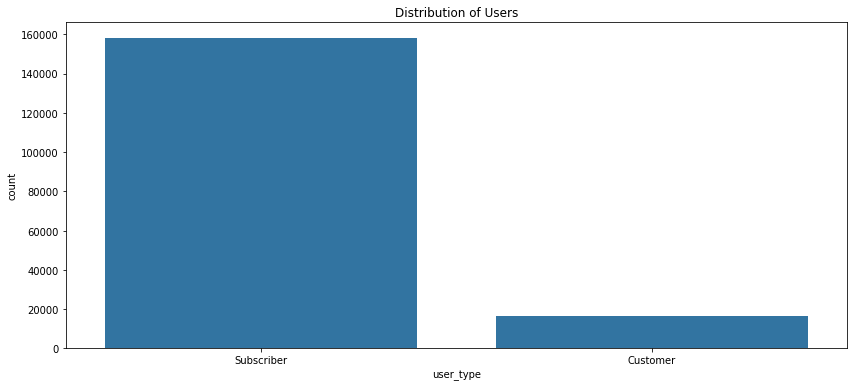

In [94]:
#create plot size
plt.figure(figsize = (14,6))

#create plot with countplot()
sns.countplot(data = ride_df, x = 'user_type', order = ride_df['user_type'].value_counts().index, color = sns.color_palette()[0]);
plt.title('Distribution of Users');

The visalization above shows the distribution of the user type of the Ford GoBike ride sharing app, and it appears that the majority are subscribers.

**User Age Distribution**

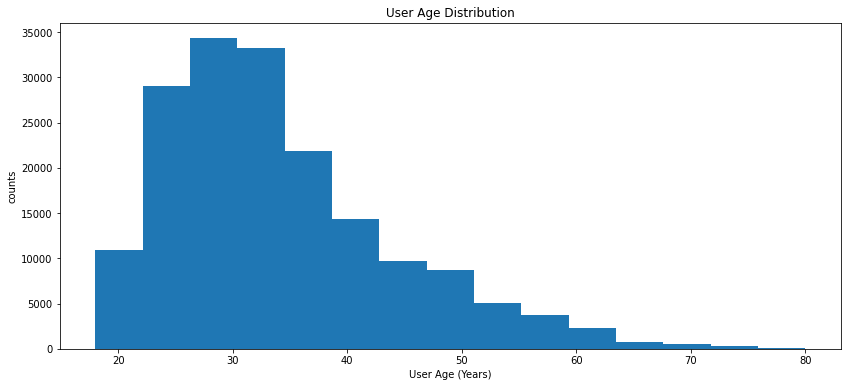

In [95]:
#create plot size
plt.figure(figsize=(14,6))

#create plot
plt.hist(ride_df['rider_age'],bins = 15);
plt.title('User Age Distribution');
plt.xlabel('User Age (Years)');
plt.ylabel('counts');

The histogram plot above show that the majority of the users are between 20 and 40 years old

**distribution of travel time**

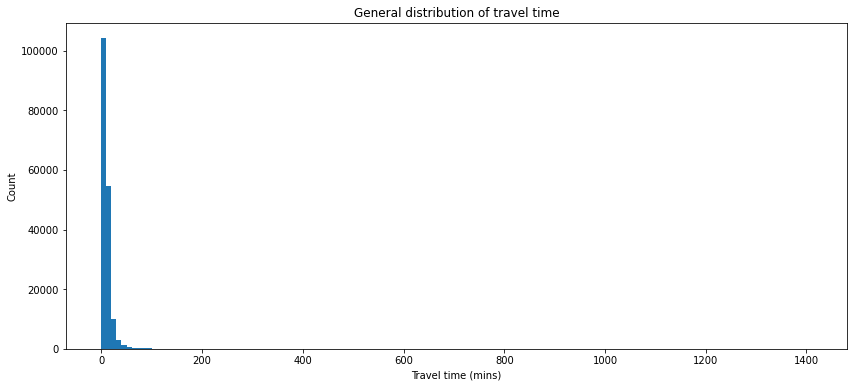

In [96]:
#create bin
binsize = 10
bins = np.arange(0, ride_df['duration_min'].max()+binsize, binsize)

#create plot size
plt.figure(figsize=[14, 6])

#create plot
plt.hist(data = ride_df, x = 'duration_min', bins = bins)
plt.xlabel('Travel time (mins)')
plt.ylabel("Count")
plt.title("General distribution of travel time")
plt.show()


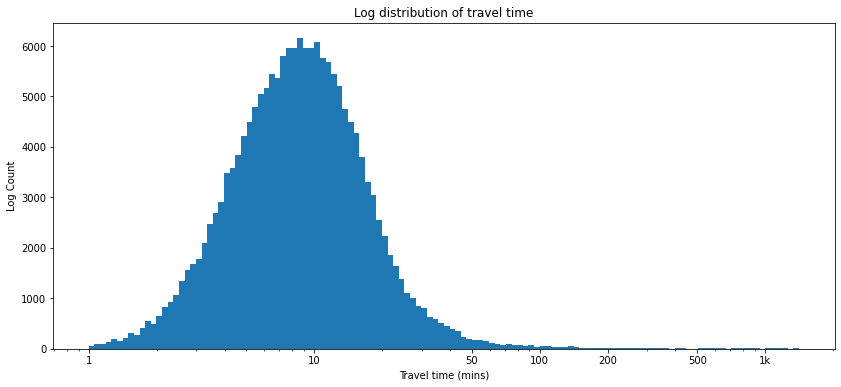

In [97]:
#create bin
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(ride_df['duration_min'].max())+log_binsize, log_binsize)

#create plot
plt.figure(figsize=[14, 6])
plt.hist(data = ride_df, x = 'duration_min', bins = bins)
plt.xscale('log')
plt.xticks([1, 10,50,100,200, 500, 1e3], [1, 10, 50,100,200,500,'1k'])
plt.xlabel('Travel time (mins)')
plt.ylabel("Log Count")
plt.title("Log distribution of travel time")
plt.show()

The visualization above showed a long tail distribution when plotted on a normal scale. When the travel duration was plotted on a log scale, the distribution appeared to have a normal distribution, with most of the riders spending upto 10 minutes travelling. From the visualization above, very few riders got to the 100 minute mark or eclisped it.

**User Gender Distribution**

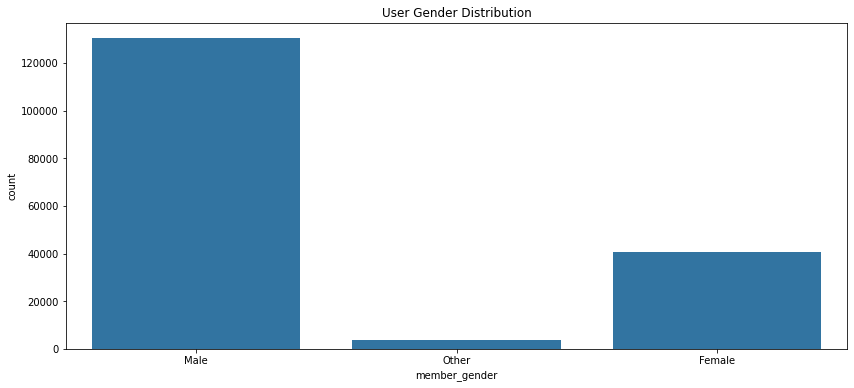

In [98]:
#create plot attributes
fig, ax = plt.subplots(figsize = [14, 6])
default_color = sns.color_palette()[0]
sns.countplot(data = ride_df, x = 'member_gender', color = default_color, ax = ax)
plt.title('User Gender Distribution');
plt.show()

The bar chart above shows the gender distribution of the users of the Ford GoBike application. The visulization above was created to provide a clearer idea into how interested the different genders are engaged in bike ride sharing. It appears that more males engage in bike riding when compared to the females, and the other gender.

#### **Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

The duration variable had a lot of data points on lower time values, this required a log transformation to get a clearer sense of what the distribution would look like. By transforming the data, the data appeared to have a normal distribution, and a peak at the 10 minute mark.

#### **Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

No unusual distributions were observed

### **Bivariate Exploration**

**USER GENDER DISTRIBUTION WITH USER TYPE**

In [99]:
def countPlot(df, xVar, hueVar, edgecolor = "black", palette = None, order = None, hue_order = None, figsize = [14, 6]):

  #create figsize attribute
  if figsize:
    plt.figure(figsize = figsize)
  #create plot
  sns.countplot(data = df, x = xVar,
                hue = hueVar, edgecolor = edgecolor, palette = palette, order = order,
                hue_order = hue_order);

  xVar = xVar.replace("_", " ")
  hueVar = hueVar.replace("_", " ")

  #create title and label
  plt.title(f"Distribution of {xVar} By {hueVar}".title(), fontsize = 14, weight = 'bold')
  plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")
  plt.ylabel("Frequency".title(), fontsize = 10, weight = "bold")
  
  #despine
  sns.despine()


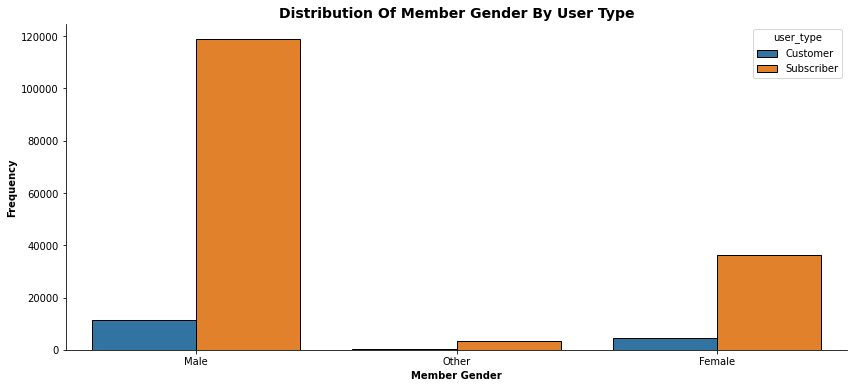

In [100]:
#call plot function
countPlot(ride_df, "member_gender", "user_type")

The Subscriber sub-category of the user type category remains the dominant category of the GoBike system. This is logical as it is much easier to make a one-time payment for product usage over a time period, compared to regular payments for each time the product is used. It is also mostly cheaper by a fraction, compared to most Pay-As-You-Use (PAYU) plans.

**Rider Age relationship with Travel Time**

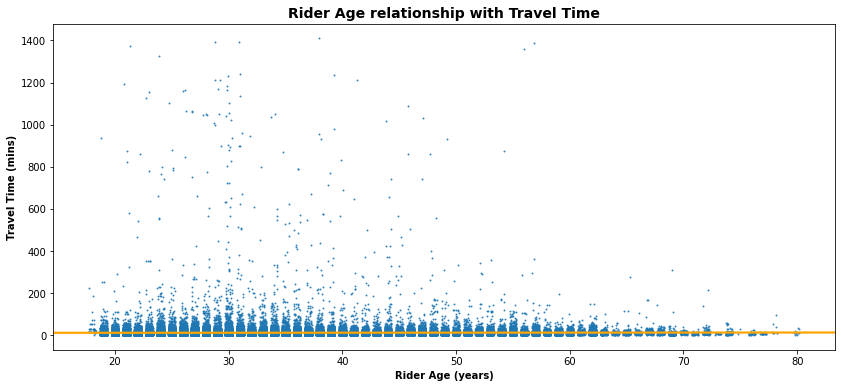

In [101]:
#create plot attributes
plt.figure(figsize=[14, 6])
sns.regplot(data = ride_df, x = 'rider_age', y = 'duration_min', 
            truncate=False, x_jitter=0.3, scatter_kws={'s':1}, line_kws={"color": "orange"});
plt.xlabel('Rider Age (years)', fontsize = 10, weight = 'bold');
plt.ylabel('Travel Time (mins)', fontsize = 10, weight = 'bold');
plt.title('Rider Age relationship with Travel Time', fontsize = 14, weight = 'bold');

The above visualization reveals no trend in terms of user age and trevel time, but the cluster of points above the orange trend line shows that majority of the travelers reaching the 200 minute mark and above, are 30 years old.

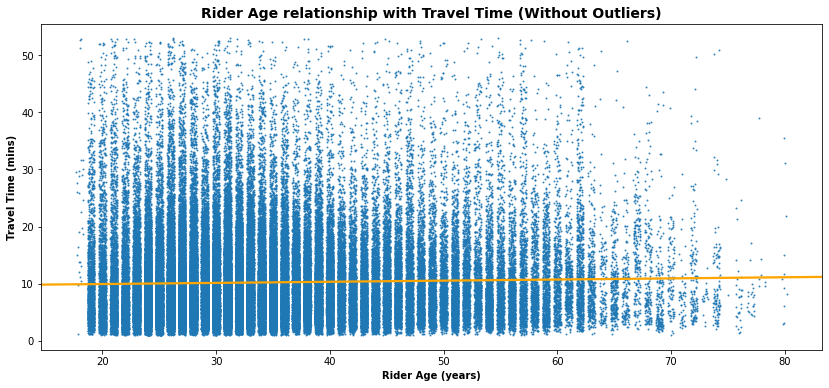

In [109]:
#create plot attributes
plt.figure(figsize = [14, 6])
sns.regplot(data = ride_df.query("duration_min<duration_min.quantile(0.99)"), 
            x = 'rider_age', y = 'duration_min', truncate=False, x_jitter=0.3, scatter_kws={'s':1}, line_kws={"color":"orange"});
plt.xlabel('Rider Age (years)', fontsize = 10, weight = 'bold')
plt.ylabel('Travel Time (mins)', fontsize = 10, weight = 'bold')
plt.title('Rider Age relationship with Travel Time (Without Outliers)', fontsize = 14, weight = 'bold');
plt.show()

This visiualization shows a visible population distribution of the rider age category. From the plot, it can be seen that the majority of the riders are below 60 years old. Another point the plot makes clear is general travel time preference, especially since the outliers have been removed. This means that up to 98 percent of the travelers choose to travel for up to 50 minutes, with the majority opting to spend under 30 minutes.

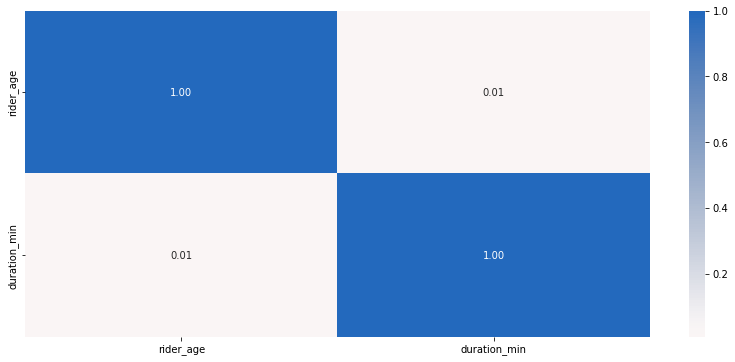

In [103]:
#create numerical variablelist
num_vrs = ["rider_age", "duration_min"]

#create plot
plt.figure(figsize = [14, 6])
sns.heatmap(ride_df[num_vrs].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

with a coefficient of 0.01, it appers that there is no correlation between rider age and travel time.

**Exploring the relationship between Start time of day, Member gender, User Type, and Day of the week**

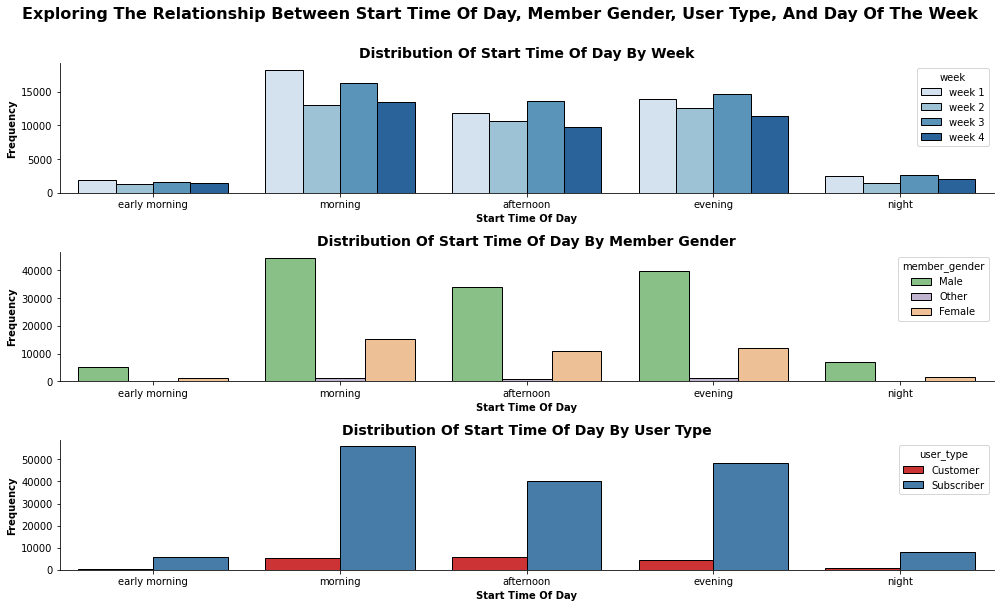

In [104]:
plt.figure(figsize = [14, 8])

# subplot 1: Start time of day vs. Week
plt.subplot(3, 1, 1)
countPlot(ride_df, 'start_time_of_day', 'week', palette = 'Blues', figsize = None)


# subplot 2: Start time of day vs. Gender
ax = plt.subplot(3, 1, 2)
#call plot function
countPlot(ride_df, 'start_time_of_day', 'member_gender', palette = 'Accent', figsize = None)


# subplot 3: Start time of day vs. User Type
ax = plt.subplot(3, 1, 3)
#call plot function
countPlot(ride_df, 'start_time_of_day', 'user_type', palette = 'Set1', figsize=None)

#add main title
plt.suptitle("Exploring the relationship between Start time of day, Member gender, User Type, and Day of the week".title(), weight = "bold", y = 1.05, fontsize = 16)

#optimize distance between subplots
plt.tight_layout()
plt.show()

#### **Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

The peak times for travel is mornings, evenings, and afternoons, in that order. This distribution was also oberved across genders and user types, with a little exception to customers. Customers tend to use the product mostly in the mornings and afternoons, especially in the afternoon

### **Multivariate Exploration**

**Relationship between Travel time, Week, and User Type**

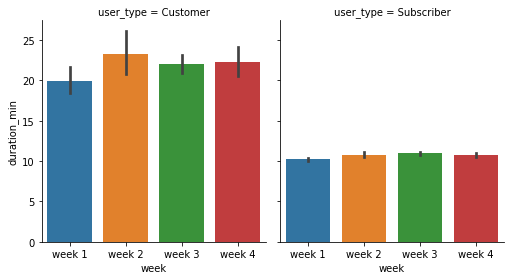

In [105]:
#create plot
sns.catplot(x = "week", y = "duration_min",
                col = "user_type",
                data = ride_df, kind = "bar",
                height=4, aspect=.9);

Interestingly, there is a relationship between user type and travel time, as is observed in the plot above. Customers tend to spend more time traveling, with an average travel time of 20 minutes. This is in contrast to the Subcribers who generally have an average travel time period of 10 minutes. There is an observed similarity in averge time spent weekly, with the Customers and Subscribers spending the least amount of time traveling in the first week.

**A Plot of the distribution of User Travel Time for each day of the week**

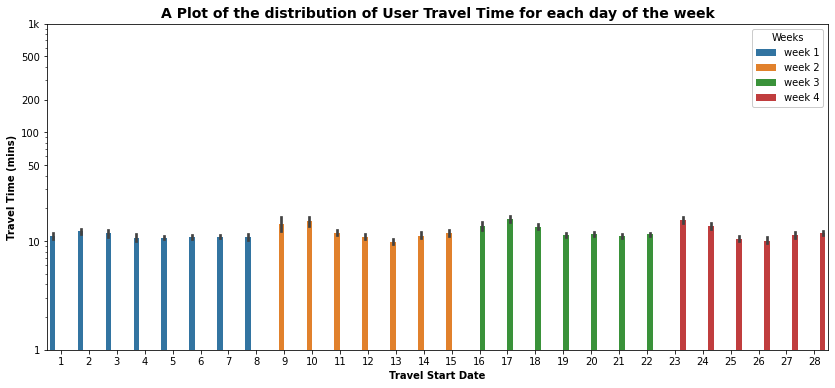

In [106]:
#create plot attributes
plt.figure(figsize=[14,6])
ax = sns.barplot(data = ride_df, x = 'start_day', y = 'duration_min', hue = 'week')
ax.legend(loc = 1, framealpha = 1, title = 'Weeks')
plt.yscale('log')
plt.yticks([1, 10, 50,100,200,500, 1e3], [1, 10, 50,100,200, 500, '1k']);
plt.xlabel('Travel Start Date', fontsize = 10, weight = 'bold')
plt.ylabel('Travel Time (mins)', fontsize = 10, weight = 'bold')
plt.title('A Plot of the distribution of User Travel Time for each day of the week', fontsize = 14, weight = 'bold');


Out of every 7 days of the week, riders spend up to 15 minutes on average traveling, which is at least 3 minutes more that the other 5 days of the week. Unsuprisingly, these 2 days fall on the weekends, Saturdays and Sundays.

**A Plot to Show Relationship Between Rider Age, Travel Time, and Travel Time of Day**

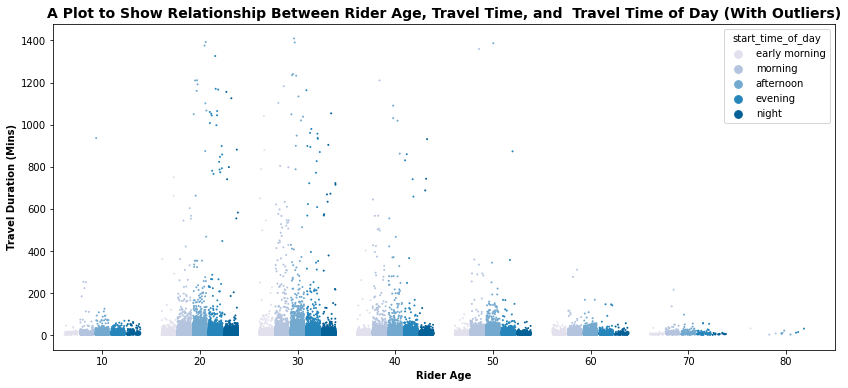

In [107]:
plt.figure(figsize=[14,6])

#create age intervals
ride_df["rider_age_int"] = ((ride_df["rider_age"]//10) * 10).astype(int)

#create plot attributes
sns.stripplot(data = ride_df, x = "rider_age_int", y = 'duration_min', hue = "start_time_of_day",
              palette = "PuBu", size = 2, jitter = 0.35, dodge = True)
plt.title("A Plot to Show Relationship Between Rider Age, Travel Time, and  Travel Time of Day (With Outliers)", fontsize=14, weight ="bold")
plt.xlabel("Rider Age", fontsize=10, weight="bold")
plt.ylabel("Travel Duration (Mins)", weight = "bold")
plt.show();

This plot gives very little indication of the relationship between rider age, travel time, and travel time of day, due to the presence of outliers in the dataset. The plot below gives a clearer visual of the relationships due to the removal of outliers. 

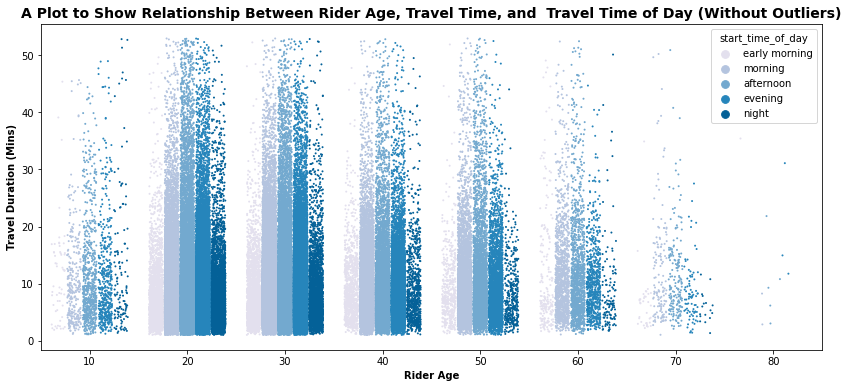

In [108]:
plt.figure(figsize=[14,6])

#create plot attributes
sns.stripplot(data = ride_df.query("duration_min<duration_min.quantile(0.99)"), x = "rider_age_int", y = 'duration_min', hue = "start_time_of_day",
              palette = "PuBu", size = 2, jitter = 0.35, dodge = True)
plt.title("A Plot to Show Relationship Between Rider Age, Travel Time, and  Travel Time of Day (Without Outliers)", fontsize=14, weight ="bold")
plt.xlabel("Rider Age", fontsize=10, weight="bold")
plt.ylabel("Travel Duration (Mins)", weight = "bold")
plt.show();

The plot reveal that riders between the ages of 20 and 40 years old tend to spend more time traveling when compared to the other age groups. The plot also reveals that afternoon and evening and night time riders tend to spend more time traveling, compared to early morning and morning time riders

#### **Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

One month's data is not enough to get a better understanding of user patterns and behaviour